# MODELO DE ML PARA DETECTAR TRANSACCIONES FRAUDULENTAS

### Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importar datos

In [2]:
df = pd.read_csv('data.csv')

In [9]:
df = df[['gender','lat', 'long', 'city_pop',  
        'category', 'amt',
        'merch_lat', 'merch_long',
       'customer_num_trans_1_day', 'customer_num_trans_7_day',
       'customer_num_trans_30_day',  'trans_time_hrs',
       'trans_time_is_night', 'trans_time_day', 'trans_date_is_weekend',
       'customer_avg_amout_1_day', 'customer_avg_amount_7_day',
       'customer_avg_amount_30_day', 'merchant_num_trans_1_day',
       'merchant_num_trans_7_day', 'merchant_num_trans_30_day',
       'merchant_risk_1_day', 'merchant_risk_7_day', 'merchant_risk_30_day',
       'merchant_risk_90_day', 'is_fraud'
    
]]

In [37]:
df['is_fraud'].value_counts()

is_fraud
0    8485449
1      94806
Name: count, dtype: int64

In [38]:
# Concatenar is_fraud cuando es 1 y una muestra de is_fraud cuando es 0 de manera aleatoria que se balancen los datos
df = pd.concat([df[df['is_fraud'] == 1], df[df['is_fraud'] == 0].sample(n=94806)], axis=0)

In [40]:
df['is_fraud'].value_counts()

is_fraud
1    94806
0    94806
Name: count, dtype: int64

## Definir X y Y

In [41]:
y = df['is_fraud']
x = df.drop(columns=['is_fraud'])

In [42]:
# Separar columnas numericas y categoricas
x_num = x.select_dtypes(include=[np.number])
x_cat = x.select_dtypes(exclude=[np.number])

In [45]:
# Usar OneHotEncoder para las columnas categoricas
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder( sparse_output=False)
x_cat_encoded = encoder.fit_transform(x_cat)

In [47]:
# Crear un dataframe con las columnas ya codificadas y renombrar las columnas
x_cat_encoded = pd.DataFrame(x_cat_encoded, columns=encoder.get_feature_names_out(x_cat.columns))

## Estandarizar

In [49]:
# Estandarizar las columnas numericas
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_num_scaled = scaler.fit_transform(x_num)

In [51]:
# Crear un dataframe con las columnas numericas y renombrar las columnas
x_num_scaled = pd.DataFrame(x_num_scaled, columns=x_num.columns)

In [53]:
# Unir los dataframes de columnas numericas y categoricas
x = pd.concat([x_num_scaled, x_cat_encoded], axis=1)

# Dividir el dataset en entrenamiento y prueba

In [55]:
# Dividir el dataset en entrenamiento y prueba
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Entrenar un modelo de regresion logistica

In [56]:
# Entrenar un modelo de regresion logistica
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)


LogisticRegression()

In [57]:
# Evaluar el modelo
from sklearn.metrics import mean_absolute_error
y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
print('MAE:', mae)

MAE: 0.1694749887930807


In [59]:
# Evaluar accuracy, precision, recall y f1-score
model.score(x_test, y_test)
print('Accuracy:', model.score(x_test, y_test))
#precision
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print('Precision:', precision)
#recall
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print('Recall:', recall)
#f1-score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print('F1 Score:', f1)

Accuracy: 0.8305250112069192
Precision: 0.8918766453553968
Recall: 0.751624319898579
F1 Score: 0.8157660885767521


In [64]:
# Usar pycaret
from pycaret.classification import setup, compare_models, create_model, tune_model, predict_model, plot_model, evaluate_model

In [60]:
x_train = x_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [61]:
# Unir en un solo dataframe x_train y y_train
train = pd.concat([x_train, y_train], axis=1)

In [62]:
# Unir en un solo dataframe x_test y y_test
test = pd.concat([x_test, y_test], axis=1)

In [67]:
# Hcer el setup  de pycaret
clf1 = setup(data=train, test_data= test, target='is_fraud', session_id=42, index=False)

,Description,Value
0,Session id,42
1,Target,is_fraud
2,Target type,Binary
3,Original data shape,"(189612, 40)"
4,Transformed data shape,"(189612, 40)"
5,Transformed train set shape,"(151689, 40)"
6,Transformed test set shape,"(37923, 40)"
7,Numeric features,39
8,Preprocess,True
9,Imputation type,simple


In [68]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9279,0.9821,0.9311,0.9252,0.9281,0.8557,0.8558,0.3490
rf,Random Forest Classifier,0.9224,0.9766,0.9050,0.9377,0.9210,0.8448,0.8453,4.2000
gbc,Gradient Boosting Classifier,0.9199,0.9774,0.9168,0.9227,0.9197,0.8399,0.8399,8.0810
ada,Ada Boost Classifier,0.9082,0.9702,0.8996,0.9155,0.9075,0.8164,0.8166,2.9620
dt,Decision Tree Classifier,0.8949,0.8949,0.8939,0.8957,0.8948,0.7897,0.7897,0.4970
et,Extra Trees Classifier,0.8683,0.9363,0.8152,0.9121,0.8609,0.7365,0.7407,2.8870
svm,SVM - Linear Kernel,0.8514,0.8823,0.7575,0.9328,0.8361,0.7028,0.7156,0.1150
lr,Logistic Regression,0.8338,0.8965,0.7564,0.8951,0.8199,0.6677,0.6759,0.4630
ridge,Ridge Classifier,0.8263,0.8944,0.7530,0.8825,0.8126,0.6526,0.6597,0.0510
lda,Linear Discriminant Analysis,0.8263,0.8944,0.7530,0.8825,0.8126,0.6526,0.6597,0.1220


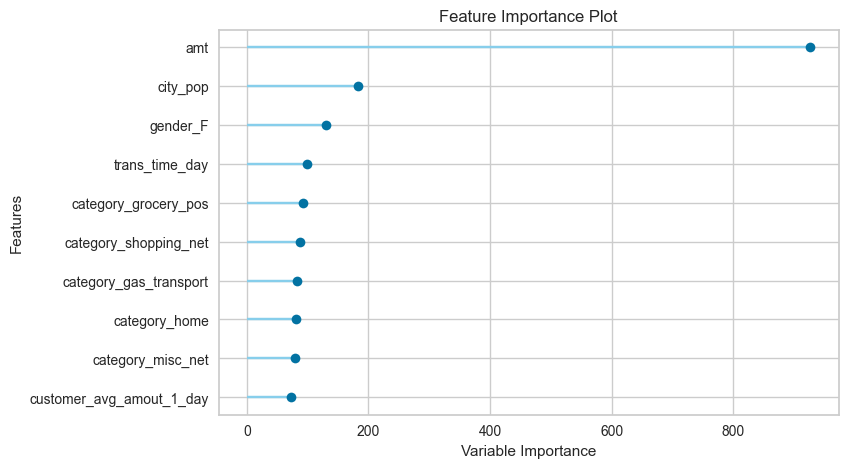

In [69]:
plot_model(best_model, plot='feature')